In [1]:
# Importing relevant libraries

import requests
import requests.auth
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

# Data Preparation

In [3]:
# Reading the dataset into a pandas CSV

df = pd.read_csv('df_2.csv')

In [4]:
df.set_index('Unnamed: 0', inplace=True)
df.index.name = None

In [5]:
df.head()

,business,LooneyTunesLogic,grandorder,turntables,Maine,Floki,belowdeck,bassfishing,dogsusingpillows,biggreenegg,...,WorldofTanksConsole,pancakes,lupinthe3rd,CookingCircleJerk,shittykickstarters,90sHipHop,codeine,evetech,AdulteryHate,Moustache
OliveInvestor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
regarding_your_cat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mr_kazemiro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
damn_montana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Philinizavr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.shape

(6192, 11076)

In [7]:
# Defining the predictors and target

X = df.drop(columns=['Target']).copy()
y = df.Target.copy()

In [8]:
# Creating a train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# Using StandardScaler(with_mean=False) to keep 0 values as 0

scaler = StandardScaler(with_mean=False)

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [10]:
# Examining target class balance and identifying baseline accuracy (approximately 51.8%)

df.Target.value_counts(normalize=True)

1.0    0.517926
0.0    0.482074
Name: Target, dtype: float64

# Feature Selection

In [ ]:
# Defining feature subsets

In [12]:
select_feat = pd.read_csv('select_feat.csv')
select_feat = list(select_feat['feature'].values)

In [18]:
super_select_feat = pd.read_csv('super_select_feat.csv')
super_select_feat = list(super_select_feat['feature'].values)

# Modelling

### Logistic Regression Variants

Logistic Regression

In [25]:
# Logistic Regression with all features

model = LogisticRegression(max_iter=1000)

kf = KFold(n_splits=5, random_state=42, shuffle=True)

model.fit(X_train, y_train)

print('Training Score:', model.score(X_train, y_train))
print('Cross Val Score:', cross_val_score(model, X_train, y_train, cv=kf).mean())
print('Test Score:', model.score(X_test, y_test))

Training Score: 0.9985867151221481
Cross Val Score: 0.7343030710740095
Test Score: 0.7029862792574657


In [26]:
cross_val_score(model, X_train, y_train, cv=kf)

array([0.75075681, 0.72956609, 0.71947528, 0.74343434, 0.72828283])

In [27]:
# Logistic Regression with initial subset of features

model = LogisticRegression(max_iter=1000)

kf = KFold(n_splits=5, random_state=42, shuffle=True)

model.fit(X_train[select_feat], y_train)

print('Training Score:', model.score(X_train[select_feat], y_train))
print('Cross Val Score:', cross_val_score(model, X_train[select_feat], y_train, cv=kf).mean())
print('Test Score:', model.score(X_test[select_feat], y_test))

Training Score: 0.8881485968100141
Cross Val Score: 0.8376689192632686
Test Score: 0.8466505246166263


In [28]:
cross_val_score(model, X_train[select_feat], y_train, cv=kf)

array([0.85368315, 0.84056509, 0.84460141, 0.82525253, 0.82424242])

In [29]:
# Logistic Regression with second narrower subset of features

model = LogisticRegression(max_iter=1000)

kf = KFold(n_splits=5, random_state=42, shuffle=True)

model.fit(X_train[super_select_feat], y_train)

print('Training Score:', model.score(X_train[super_select_feat], y_train))
print('Cross Val Score:', cross_val_score(model, X_train[super_select_feat], y_train, cv=kf).mean())
print('Test Score:', model.score(X_test[super_select_feat], y_test))

Training Score: 0.8273773470623864
Cross Val Score: 0.8271673342914514
Test Score: 0.8038740920096852


In [30]:
cross_val_score(model, X_train[super_select_feat], y_train, cv=kf)

array([0.8506559 , 0.83854692, 0.83249243, 0.8010101 , 0.81313131])

Bagging Classifier with Logistic Regression

In [31]:
# Using all features

model = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000))

kf = KFold(n_splits=5, random_state=42, shuffle=True)

model.fit(X_train, y_train)

print('Training Score:', model.score(X_train, y_train))
print('Cross Val Score:', cross_val_score(model, X_train, y_train, cv=kf).mean())
print('Test Score:', model.score(X_test, y_test))

Training Score: 0.9830405814657783
Cross Val Score: 0.7458100683933176
Test Score: 0.7199354317998385


In [32]:
cross_val_score(model, X_train, y_train, cv=kf)

array([0.77194753, 0.75277497, 0.73662967, 0.74949495, 0.74343434])

In [33]:
# Using inital subset of features

model = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000))

kf = KFold(n_splits=5, random_state=42, shuffle=True)

model.fit(X_train[select_feat], y_train)

print('Training Score:', model.score(X_train[select_feat], y_train))
print('Cross Val Score:', cross_val_score(model, X_train[select_feat], y_train, cv=kf).mean())
print('Test Score:', model.score(X_test[select_feat], y_test))

Training Score: 0.886129618413083
Cross Val Score: 0.8394871010814502
Test Score: 0.8385794995964487


In [34]:
cross_val_score(model, X_train[select_feat], y_train, cv=kf)

array([0.84964682, 0.83652876, 0.84561049, 0.83434343, 0.82626263])

In [35]:
# Using second narrower subset of features

model = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000))

kf = KFold(n_splits=5, random_state=42, shuffle=True)

model.fit(X_train[super_select_feat], y_train)

print('Training Score:', model.score(X_train[super_select_feat], y_train))
print('Cross Val Score:', cross_val_score(model, X_train[super_select_feat], y_train, cv=kf).mean())
print('Test Score:', model.score(X_test[super_select_feat], y_test))

Training Score: 0.8295982232990107
Cross Val Score: 0.8308039017827109
Test Score: 0.8071025020177562


In [36]:
cross_val_score(model, X_train[super_select_feat], y_train, cv=kf)

array([0.8506559 , 0.84056509, 0.83753784, 0.8020202 , 0.81717172])

Bagging Classifier with Logistic Regression and bootstrap_features=True

In [53]:
# Using all features

model = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000), bootstrap_features=True)

kf = KFold(n_splits=5, random_state=42, shuffle=True)

model.fit(X_train, y_train)

print('Training Score:', model.score(X_train, y_train))
print('Cross Val Score:', cross_val_score(model, X_train, y_train, cv=kf).mean())
print('Test Score:', model.score(X_test, y_test))

Training Score: 0.9886937209771856
Cross Val Score: 0.7536841676094955
Test Score: 0.738498789346247


In [54]:
cross_val_score(model, X_train, y_train, cv=kf)

array([0.76185671, 0.75882947, 0.75782038, 0.74848485, 0.75858586])

In [37]:
# Using inital subset of features

model = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000), bootstrap_features=True)

kf = KFold(n_splits=5, random_state=42, shuffle=True)

model.fit(X_train[select_feat], y_train)

print('Training Score:', model.score(X_train[select_feat], y_train))
print('Cross Val Score:', cross_val_score(model, X_train[select_feat], y_train, cv=kf).mean())
print('Test Score:', model.score(X_test[select_feat], y_test))

Training Score: 0.886129618413083
Cross Val Score: 0.8463523224169036
Test Score: 0.8523002421307506


In [38]:
cross_val_score(model, X_train[select_feat], y_train, cv=kf)

array([0.85166498, 0.84561049, 0.86478305, 0.84242424, 0.83939394])

In [39]:
# Using second narrower subset of features

model = BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000), bootstrap_features=True)

kf = KFold(n_splits=5, random_state=42, shuffle=True)

model.fit(X_train[super_select_feat], y_train)

print('Training Score:', model.score(X_train[super_select_feat], y_train))
print('Cross Val Score:', cross_val_score(model, X_train[super_select_feat], y_train, cv=kf).mean())
print('Test Score:', model.score(X_test[super_select_feat], y_test))

Training Score: 0.8304058146577832
Cross Val Score: 0.8443282471536759
Test Score: 0.8062953995157385


In [40]:
cross_val_score(model, X_train[super_select_feat], y_train, cv=kf)

array([0.84258325, 0.84258325, 0.83551968, 0.81515152, 0.82020202])

### Decision Tree Variants

Decision Tree

In [55]:
# Decision Tree with all features

dtc = DecisionTreeClassifier()

kf = KFold(n_splits=5, random_state=42, shuffle=True)

dtc.fit(X_train, y_train)

print('Training Score:', dtc.score(X_train, y_train))
print('Cross Val Score:', cross_val_score(dtc, X_train, y_train, cv=kf).mean())
print('Test Score:', dtc.score(X_test, y_test))

Training Score: 1.0
Cross Val Score: 0.9127798672904627
Test Score: 0.9112187247780468


In [56]:
cross_val_score(dtc, X_train, y_train, cv=kf)

array([0.9172553 , 0.91523713, 0.91220989, 0.91919192, 0.91515152])

In [41]:
# Decision Tree with initial subset of features

dtc = DecisionTreeClassifier()

kf = KFold(n_splits=5, random_state=42, shuffle=True)

dtc.fit(X_train[select_feat], y_train)

print('Training Score:', dtc.score(X_train[select_feat], y_train))
print('Cross Val Score:', cross_val_score(dtc, X_train[select_feat], y_train, cv=kf).mean())
print('Test Score:', dtc.score(X_test[select_feat], y_test))

Training Score: 0.9997981021603068
Cross Val Score: 0.9137918029946285
Test Score: 0.9128329297820823


In [42]:
cross_val_score(dtc, X_train[select_feat], y_train, cv=kf)

array([0.92028254, 0.90413724, 0.90918264, 0.92020202, 0.92222222])

In [43]:
# Decision Tree with second narrower subset of features

dtc = DecisionTreeClassifier()

kf = KFold(n_splits=5, random_state=42, shuffle=True)

dtc.fit(X_train[super_select_feat], y_train)

print('Training Score:', dtc.score(X_train[super_select_feat], y_train))
print('Cross Val Score:', cross_val_score(dtc, X_train[super_select_feat], y_train, cv=kf).mean())
print('Test Score:', dtc.score(X_test[super_select_feat], y_test))

Training Score: 0.9993943064809206
Cross Val Score: 0.9018764843184621
Test Score: 0.8999192897497982


In [44]:
cross_val_score(dtc, X_train[super_select_feat], y_train, cv=kf)

array([0.91321897, 0.90413724, 0.90010091, 0.89494949, 0.90707071])

Bagging Classifier with Decision Tree

In [57]:
# Using all features

bc = BaggingClassifier(base_estimator=DecisionTreeClassifier())

kf = KFold(n_splits=5, random_state=42, shuffle=True)

bc.fit(X_train, y_train)

print('Training Score:', bc.score(X_train, y_train))
print('Cross Val Score:', cross_val_score(bc, X_train, y_train, cv=kf).mean())
print('Test Score:', bc.score(X_test, y_test))

Training Score: 0.9917221885725823
Cross Val Score: 0.9339795533539228
Test Score: 0.9297820823244553


In [58]:
cross_val_score(bc, X_train, y_train, cv=kf)

array([0.93743693, 0.93239152, 0.92633703, 0.93030303, 0.93333333])

In [45]:
# Using initial subset of features

bc = BaggingClassifier(base_estimator=DecisionTreeClassifier())

kf = KFold(n_splits=5, random_state=42, shuffle=True)

bc.fit(X_train[select_feat], y_train)

print('Training Score:', bc.score(X_train[select_feat], y_train))
print('Cross Val Score:', cross_val_score(bc, X_train[select_feat], y_train, cv=kf).mean())
print('Test Score:', bc.score(X_test[select_feat], y_test))

Training Score: 0.9905108015344236
Cross Val Score: 0.9323652264318257
Test Score: 0.9265536723163842


In [46]:
cross_val_score(bc, X_train[select_feat], y_train, cv=kf)

array([0.93642785, 0.92330979, 0.92936428, 0.93535354, 0.92626263])

In [47]:
# Using second narrower subset of features

bc = BaggingClassifier(base_estimator=DecisionTreeClassifier())

kf = KFold(n_splits=5, random_state=42, shuffle=True)

bc.fit(X_train[super_select_feat], y_train)

print('Training Score:', bc.score(X_train[super_select_feat], y_train))
print('Cross Val Score:', cross_val_score(bc, X_train[super_select_feat], y_train, cv=kf).mean())
print('Test Score:', bc.score(X_test[super_select_feat], y_test))

Training Score: 0.9901070058550373
Cross Val Score: 0.928124025318778
Test Score: 0.9249394673123487


In [48]:
cross_val_score(bc, X_train[super_select_feat], y_train, cv=kf)

array([0.93440969, 0.92532795, 0.93239152, 0.92626263, 0.93434343])

Random Forest

In [59]:
# Using all features

rfc = RandomForestClassifier()

kf = KFold(n_splits=5, random_state=42, shuffle=True)

rfc.fit(X_train, y_train)

print('Training Score:', rfc.score(X_train, y_train))
print('Cross Val Score:', cross_val_score(rfc, X_train, y_train, cv=kf).mean())
print('Test Score:', rfc.score(X_test, y_test))

Training Score: 1.0
Cross Val Score: 0.9133853163318351
Test Score: 0.9063761097659403


In [60]:
cross_val_score(rfc, X_train, y_train, cv=kf)

array([0.92330979, 0.91120081, 0.91826438, 0.92020202, 0.92222222])

In [49]:
# Using initial subset of features

rfc = RandomForestClassifier()

kf = KFold(n_splits=5, random_state=42, shuffle=True)

rfc.fit(X_train[select_feat], y_train)

print('Training Score:', rfc.score(X_train[select_feat], y_train))
print('Cross Val Score:', cross_val_score(rfc, X_train[select_feat], y_train, cv=kf).mean())
print('Test Score:', rfc.score(X_test[select_feat], y_test))

Training Score: 0.9997981021603068
Cross Val Score: 0.9372080033432203
Test Score: 0.9378531073446328


In [50]:
cross_val_score(rfc, X_train[select_feat], y_train, cv=kf)

array([0.93743693, 0.93440969, 0.9445005 , 0.94040404, 0.93737374])

In [51]:
# Using second narrower subset of features

rfc = RandomForestClassifier()

kf = KFold(n_splits=5, random_state=42, shuffle=True)

rfc.fit(X_train[super_select_feat], y_train)

print('Training Score:', rfc.score(X_train[super_select_feat], y_train))
print('Cross Val Score:', cross_val_score(rfc, X_train[super_select_feat], y_train, cv=kf).mean())
print('Test Score:', rfc.score(X_test[super_select_feat], y_test))

Training Score: 0.9993943064809206
Cross Val Score: 0.9351924899856282
Test Score: 0.9265536723163842


In [52]:
cross_val_score(rfc, X_train[super_select_feat], y_train, cv=kf)

array([0.93844601, 0.92230071, 0.92734612, 0.93636364, 0.93636364])

# Analysis & Evaluation 

Best Performing Model - Random Forest Classifier with initial feature subset (select_feat)

In [63]:
rfc = RandomForestClassifier()

kf = KFold(n_splits=5, random_state=42, shuffle=True)

rfc.fit(X_train[select_feat], y_train)

print('Training Score:', rfc.score(X_train[select_feat], y_train))
print('Cross Val Score:', cross_val_score(rfc, X_train[select_feat], y_train, cv=kf).mean())
print('Test Score:', rfc.score(X_test[select_feat], y_test))

Training Score: 0.9997981021603068
Cross Val Score: 0.9380162880061972
Test Score: 0.937046004842615


In [64]:
cross_val_score(rfc, X_train[select_feat], y_train, cv=kf)

array([0.94147326, 0.93239152, 0.94147326, 0.93838384, 0.93737374])

The high mean CV score (>0.90) causes concerns about over-fitting. However the individual CV scores are very tight and both the individual CV scores and the mean CV score are very close to the test score.

This would suggest that the model is infact not over-fitting and is performing remarkably well.

Also if there were data leakage, scores of all models would be exceptionally high which is not the case as demonstrated by the score of the worst performing model/features combination ie Logistic Regression with all features achieving a mean CV Score of 0.7343030710740095 and a Test Score of 0.7029862792574657

Models using only the inital subset of features (select_feat) perform better than those using all features and those using the second narrower subset (super_select_feat).

Logistic Regression

In [127]:
# Using this Logistic Regression model to extract coefficient signs
# This allows us to identify which class each feature contributes to

model = LogisticRegression(max_iter=1000)

kf = KFold(n_splits=5, random_state=42, shuffle=True)

model.fit(X_train[select_feat], y_train)

print('Training Score:', model.score(X_train[select_feat], y_train))
print('Cross Val Score:', cross_val_score(model, X_train[select_feat], y_train, cv=kf).mean())
print('Test Score:', model.score(X_test[select_feat], y_test))

Training Score: 0.8881485968100141
Cross Val Score: 0.8376689192632686
Test Score: 0.8466505246166263


In [128]:
cross_val_score(model, X_train[select_feat], y_train, cv=kf)

array([0.85368315, 0.84056509, 0.84460141, 0.82525253, 0.82424242])

In [161]:
# Random Forest Feature Importances

tree_sig_df = pd.DataFrame(list(zip(rfc.feature_names_in_, rfc.feature_importances_)), 
                           columns=['feature', 'importance'])

In [162]:
# Logistic Regression Coefficients

log_sig_df = pd.DataFrame(list(zip(model.feature_names_in_, model.coef_[0])), 
                          columns=['feature', 'coefficient'])

In [163]:
# Creating a pandas dataframe containing the features in our initial subset
# as well as their importance (Random Forest) and coefficient (Logistic Regression)

analysis_df = pd.merge(tree_sig_df, log_sig_df, how='inner', on='feature')

In [164]:
analysis_df

,feature,importance,coefficient
0,AskReddit,0.019729,-0.181334
1,aww,0.204557,-4.569824
2,pics,0.015245,0.007791
3,funny,0.013293,-0.037399
4,interestingasfuck,0.005285,-0.017194
...,...,...,...
393,Nio,0.000082,0.568674
394,algotrading,0.000110,0.029214
395,AreTheStraightsOK,0.000129,-0.791729
396,supersecretyachtclub,0.000121,0.716455


In [173]:
# Creating a new column and applying the coefficient signs (+/-) to the feature importance values
# Features with positive values contribute to target class 1 ie has interacted with wallstreetbets
# Those with negative values contribute to target class 0 ie has NOT interacted with wallstreetbets

analysis_df['imp_vec'] = ''

for i in range(len(analysis_df)):
    
    if analysis_df.loc[i, 'coefficient'] < 0:
        
        analysis_df.loc[i, 'imp_vec'] = analysis_df.loc[i, 'importance'] * -1
        
    else:
        
        analysis_df.loc[i, 'imp_vec'] = analysis_df.loc[i, 'importance']
    

In [175]:
# Sorting the dataframe by the new column 'imp_vec' to identify the features with the most positive and negative values

analysis_df.sort_values(by='imp_vec', inplace=True)
analysis_df.reset_index(drop=True, inplace=True)

In [176]:
analysis_df

,feature,importance,coefficient,imp_vec
0,aww,0.204557,-4.569824,-0.204557
1,science,0.072698,-5.612044,-0.072698
2,food,0.072410,-0.875341,-0.07241
3,AskReddit,0.019729,-0.181334,-0.019729
4,funny,0.013293,-0.037399,-0.013293
...,...,...,...,...
393,pics,0.015245,0.007791,0.015245
394,StockMarket,0.017540,2.959843,0.01754
395,CryptoCurrency,0.019469,0.221166,0.019469
396,stocks,0.032658,0.445383,0.032658


In [182]:
# Extracting the 10 most positive values and the 10 most negative

a_df = pd.concat([analysis_df.head(10), analysis_df.tail(10)])
a_df.reset_index(drop=True, inplace=True)

In [183]:
a_df

,feature,importance,coefficient,imp_vec
0,aww,0.204557,-4.569824,-0.204557
1,science,0.072698,-5.612044,-0.072698
2,food,0.072410,-0.875341,-0.07241
3,AskReddit,0.019729,-0.181334,-0.019729
4,funny,0.013293,-0.037399,-0.013293
5,cats,0.007014,-0.061612,-0.007014
6,gaming,0.006880,-0.117635,-0.00688
7,MadeMeSmile,0.006322,-0.229009,-0.006322
8,news,0.006132,-0.090603,-0.006132
9,AnimalsBeingDerps,0.005568,-0.157902,-0.005568


<BarContainer object of 20 artists>

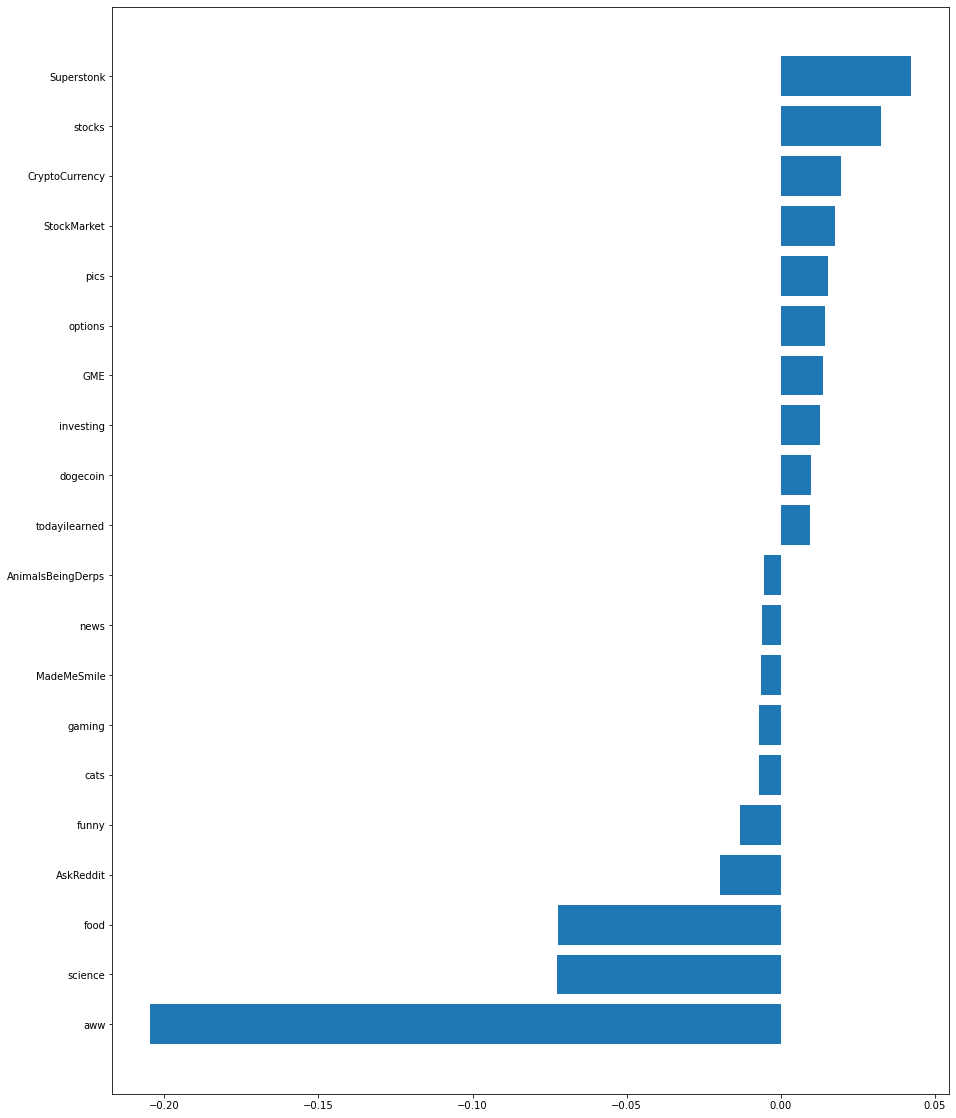

In [188]:
# Plotting a horizontal bar chart of the 20 most significant features along with which class they contribute to
# Features with positive values contribute to target class 1 ie has interacted with wallstreetbets
# Those with negative values contribute to target class 0 ie has NOT interacted with wallstreetbets

plt.figure(figsize=(15, 20))
plt.barh(a_df.feature, a_df.imp_vec)

With the data we have, it is easier to predict that a user is not a member of 'wallstreetbets' than it is to predict that they are (ie easier to predict Target class of 0 than Target class of 1) as demonstrated by the figure above.

ie by process of elimination.

/Users/ayman_aboufaied/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x720 with 0 Axes>

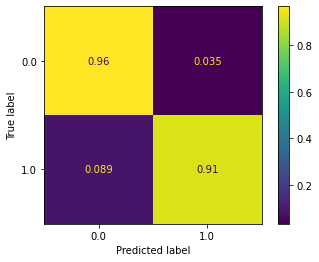

In [189]:
# Examing the normalised confusion matrix

plt.figure(figsize=(10,10))
plot_confusion_matrix(rfc, X_test[select_feat], y_test, normalize='true')

In [223]:
# Overview of key metrics to evaluate the model's performance 

print(classification_report(y_test, rfc.predict(X_test[select_feat])))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94       597
         1.0       0.97      0.91      0.94       642

    accuracy                           0.94      1239
   macro avg       0.94      0.94      0.94      1239
weighted avg       0.94      0.94      0.94      1239



#### Accuracy = (tp + tn) / (tp + fp + tn + fn)

The accuracy measures the proportion of correct guesses, regardless of class.

#### Precision = tp / (tp + fp)

The precision measures how many times the true label was positive out of all the times the classifier predicted a positive label.

#### Recall = tp / (tp + fn)

The recall measures how many times the predicted label was positive out of all the times the true label was positive.

#### F1-score = 2 * (precision * recall) / (precision + recall)

The F1-score is the harmonic mean of the precision and recall metrics.

In [ ]:
# precision and recall are the metrics we are most interested in - precision being the most important
# we want everyone observation we predict a 1 for to actually be a 1

/Users/ayman_aboufaied/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


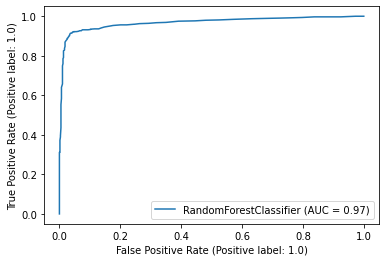

In [226]:
# Taking a look at the ROC curve

plot_roc_curve(rfc, X_test[select_feat], y_test) 

#### True Positive Rate (Recall)

The true positive rate measures how many times the predicted label was positive out of all the times the true label was positive.

#### False Positive Rate

The false positive rate measures how many times the predicted label was positive out of all the times the true label was negative.

From the ROC (Receiver Operating Characteristic) curve above, we can evaluate that highest True Positive Rate (Recall) we can achieve without significantly increasing the False Positive Rate is slightly above 0.90 which results in a False Positive Rate of slightly below 0.05.

In other words, it demonstrates the maximum proportion of the positive Target class we can correctly capture and label without also incorrectly capturing and mislabelling a significant proportion of the negative Target class.

In [193]:
from sklearn.metrics import PrecisionRecallDisplay

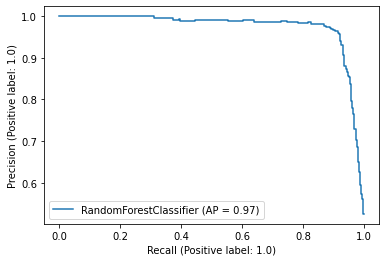

In [194]:
# Taking a look at the Precision Recall curve

PrecisionRecallDisplay.from_estimator(rfc, X_test[select_feat], y_test)

#### Precision
The precision measures how many times the true label was positive out of all the times the classifier predicted a positive label.

#### Recall
The recall measures how many times the predicted label was positive out of all the times the true label was positive.

From the Precision Recall curve above, we can evaluate the highest Recall we can acheive without significantly diminishing the Precision is slightly below 0.95 which results in a Precision of slightly above 0.95.

In other words, it demonstrates the proportion of the true positive Target class we are able to correctly capture and label as compared to what proportion of our predicted positive observations were correctly captured and labelled.

In [ ]:
# We want to minimize false positives
# Trying to predict whether someone is a member of wallstreetbets
# We would rather have everyone predicted to be a member actually be a member
# and misclassify some members as non-members

In [195]:
pred_true = pd.DataFrame(rfc.predict_proba(X_test[select_feat]))

In [196]:
pred_true['pred'] = rfc.predict(X_test[select_feat])
pred_true['true'] = y_test.values

In [197]:
pred_true

,0,1,pred,true
0,0.86,0.14,0.0,0.0
1,0.96,0.04,0.0,0.0
2,0.97,0.03,0.0,0.0
3,0.03,0.97,1.0,1.0
4,0.90,0.10,0.0,0.0
...,...,...,...,...
1234,0.06,0.94,1.0,1.0
1235,0.94,0.06,0.0,0.0
1236,0.07,0.93,1.0,1.0
1237,0.93,0.07,0.0,0.0


In [198]:
# Mean predict_proba when we correctly predict target value of 1 (predict 1, actual 1)

pred_true[(pred_true.pred == 1) & (pred_true.pred == pred_true.true)][1].mean()

0.8946010657477053

In [199]:
# Mean predict_proba when we incorrectly predict target value of 1 (predict 1, actual 0)

pred_true[(pred_true.pred == 1) & (pred_true.pred != pred_true.true)][1].mean()

0.6987574829240857

In [200]:
# Implementing an new probability threshold of 0.8 (default is 0.5) to examine the tradeoff between precision & recall

pred_80 = []

for i in range(len(pred_true)):
    
    if pred_true.loc[i, 1] >= 0.8:
        
        pred_80.append(1.0)
        
    else:
        
        pred_80.append(0.0)

In [201]:
pred_true['pred_80'] = pred_80

In [202]:
pred_true.head()

,0,1,pred,true,pred_80
0,0.86,0.14,0.0,0.0,0.0
1,0.96,0.04,0.0,0.0,0.0
2,0.97,0.03,0.0,0.0,0.0
3,0.03,0.97,1.0,1.0,1.0
4,0.90,0.10,0.0,0.0,0.0


In [203]:
# pred_80 true positive

len(pred_true[(pred_true.pred_80 == 1) & (pred_true.pred_80 == pred_true.true)])

475

In [204]:
# pred_80 false positive

len(pred_true[(pred_true.pred_80 == 1) & (pred_true.pred_80 != pred_true.true)])

6

In [205]:
# pred_80 true negative

len(pred_true[(pred_true.pred_80 == 0) & (pred_true.pred_80 == pred_true.true)])

591

In [206]:
# pred_80 false negative

len(pred_true[(pred_true.pred_80 == 0) & (pred_true.pred_80 != pred_true.true)])

167

In [ ]:
# accuracy = (tp + tn) / (tp + fp + tn + fn)
# precision = tp / (tp + fp)
# recall = tp / (tp + fn)

In [217]:
# pred_80 accuracy

(475 + 591) / (475 + 6 + 591 + 167)

0.8603712671509282

In [218]:
# pred_80 precision

475 / (475 + 6)

0.9875259875259875

In [219]:
# pred_80 recall

475 / (475 + 167)

0.7398753894080997

By changing the threshold of predict_proba to 0.80,
an approx 0.02 increase in precision (0.97 -> 0.987) results in an approx 0.17 decrease in recall (0.91 -> 0.739).

In [ ]:
# Investigating

In [299]:
# Extracting the index values of those observation that were misclassified by the model 

prec_inv = pred_true[(pred_true.pred == 1) & (pred_true.true == 0)].index
recal_inv = pred_true[(pred_true.pred == 0) & (pred_true.true == 1)].index

In [306]:
# Extracting the relevant rows & columns from the dataset to investigate

prec_df = X_test.loc[prec_inv, select_feat].replace(0, np.nan).copy()
recal_df = X_test.loc[recal_inv, select_feat].replace(0, np.nan).copy()

In [309]:
# Precision - 21 users were misclassified as Target class 1 when they were actually Target class 0

prec_df.shape

(21, 398)

In [313]:
prec_df.isna().sum()

AskReddit                6
aww                     14
pics                    16
funny                   17
interestingasfuck       18
                        ..
Nio                     21
algotrading             21
AreTheStraightsOK       21
supersecretyachtclub    21
ClashRoyale             21
Length: 398, dtype: int64

In [319]:
prec_df.isna().sum()[prec_df.isna().sum() != prec_df.shape[0]]

AskReddit                 6
aww                      14
pics                     16
funny                    17
interestingasfuck        18
                         ..
Forex                    20
CreditCards              20
newzealand               20
90dayfianceuncensored    20
Repsneakers              20
Length: 131, dtype: int64

In [322]:
# Extracting the non-empty columns for users misclassified as Target class 1

prec_subs = prec_df.isna().sum()[prec_df.isna().sum() != prec_df.shape[0]].index

In [315]:
# Recall - 57 users were misclassified as Target class 0 when they were actually Target class 1

recal_df.shape

(57, 398)

In [316]:
recal_df.isna().sum()

AskReddit               24
aww                     34
pics                    28
funny                   28
interestingasfuck       46
                        ..
Nio                     57
algotrading             55
AreTheStraightsOK       57
supersecretyachtclub    57
ClashRoyale             57
Length: 398, dtype: int64

In [320]:
recal_df.isna().sum()[recal_df.isna().sum() != recal_df.shape[0]]

AskReddit            24
aww                  34
pics                 28
funny                28
interestingasfuck    46
                     ..
shib                 56
Audi                 56
Boxing               56
Undertale            56
algotrading          55
Length: 212, dtype: int64

In [324]:
# Extracting the non-empty columns for users misclassified as Target class 0

recal_subs = recal_df.isna().sum()[recal_df.isna().sum() != recal_df.shape[0]].index

In [325]:
# The features that were used in both types of misclassification

prec_subs.intersection(recal_subs)

Index(['AskReddit', 'aww', 'pics', 'funny', 'interestingasfuck', 'news',
       'antiwork', 'gaming', 'science', 'worldnews',
       ...
       'AMA', 'binance', 'biology', 'Zoomies', 'softwaregore', 'NoFap', 'tax',
       'CreditCards', '90dayfianceuncensored', 'Repsneakers'],
      dtype='object', length=102)

In [326]:
# The features that were used in only one or the other types of misclassification, but not both 

prec_subs.symmetric_difference(recal_subs)

Index(['2007scape', 'AMCSTOCKS', 'AdviceAnimals', 'AnimalsBeingJerks',
       'Aquariums', 'ArtefactPorn', 'AskNYC', 'AskOuija', 'AskThe_Donald',
       'Audi',
       ...
       'therewasanattempt', 'tifu', 'ufc', 'unitedkingdom', 'vegan',
       'wallstreetbetsOGs', 'whatisthisthing', 'whatsthisbug',
       'whatsthisplant', 'worldpolitics'],
      dtype='object', length=139)

In [330]:
# The features that were used in the type of misclassification that hindered model precision but not recall

prec_subs.difference(recal_subs)

Index(['AMCSTOCKS', 'AskThe_Donald', 'CoinBase', 'CryptoMarkets', 'DDintoGME',
       'DeepFuckingValue', 'Fire', 'Forex', 'GME', 'GMEJungle', 'SafeMoon',
       'SatoshiStreetBets', 'StockMarket', 'WallStreetBetsCrypto',
       'Wallstreetbetsnew', 'amcstock', 'battlefield2042', 'booksuggestions',
       'dadjokes', 'dividends', 'ethereum', 'ethtrader', 'gme_meltdown',
       'houseplants', 'loopringorg', 'lotrmemes', 'microgrowery', 'newzealand',
       'smallbusiness'],
      dtype='object')

In [328]:
# The features that were used in the type of misclassification that hindered model recall but not precision

recal_subs.difference(prec_subs)

Index(['2007scape', 'AdviceAnimals', 'AnimalsBeingJerks', 'Aquariums',
       'ArtefactPorn', 'AskNYC', 'AskOuija', 'Audi', 'Austin', 'AutoDetailing',
       ...
       'therewasanattempt', 'tifu', 'ufc', 'unitedkingdom', 'vegan',
       'wallstreetbetsOGs', 'whatisthisthing', 'whatsthisbug',
       'whatsthisplant', 'worldpolitics'],
      dtype='object', length=110)

# Testing model performance with outliers

In [227]:
# Reading dataset with outliers into a pandas dataframe

outlier_df = pd.read_csv('reddit_class_data.csv')

In [228]:
outlier_df.set_index('Unnamed: 0', inplace=True)
outlier_df.index.name = None

In [229]:
# Shape of dataset with outliers

outlier_df.shape

(6480, 25609)

In [230]:
# Checking for empty columns

outlier_df.isna().sum()[outlier_df.isna().sum() == outlier_df.shape[0]]

Series([], dtype: int64)

In [231]:
# Identifying baseline accuracy

outlier_df.Target.value_counts(normalize=True)

1.0    0.519753
0.0    0.480247
Name: Target, dtype: float64

In [232]:
# Replace NaN values with 0

outlier_df.replace(np.nan, 0, inplace=True)

In [248]:
outlier_df.head()

,business,LooneyTunesLogic,UTAustin,grandorder,turntables,Maine,Floki,Gaming_Headsets,belowdeck,bassfishing,...,AutismTranslated,WomenWithWatches,QMEE,ColoradoSwingers,mitralvalveprolapse,teams,GeorgiaCampAndHike,KazuhaMains,TRGMakesMusic,lucky
OliveInvestor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
regarding_your_cat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mr_kazemiro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
damn_montana,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Philinizavr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
# Number of observations in dataset without outliers

len(df.index)

6192

In [252]:
# Number of observations in dataset with outliers

len(outlier_df.index)

6480

In [260]:
# Number of outliers

len(list(set(outlier_df.index) - set(df.index)))

288

In [261]:
# Extracting the usernames of the outliers into a list

out_users = list(set(outlier_df.index) - set(df.index))

In [271]:
# Seperating predictors and target in dataset with only outliers

X_2_outliers = X_2.loc[out_users, :].copy()
y_2_outliers = y_2[out_users].copy()

In [273]:
# Scaling data with StandardScaler (transforming without fitting) 

# Using StandardScaler(with_mean=False) to keep 0 values as 0

X_2_outliers = pd.DataFrame(scaler.transform(X_2_outliers[X_train.columns]), columns=X_2_outliers[X_train.columns].columns)

X_std = pd.DataFrame(scaler.transform(X[X_train.columns]), columns=X[X_train.columns].columns)

In [351]:
# Original test score

print('X_test Score:', rfc.score(X_test[select_feat], y_test))

X_train Score: 0.9997981021603068
X_test Score: 0.937046004842615


In [353]:
# Outlier test score

print('X_2_outlier Score:', rfc.score(X_2_outliers[select_feat], y_2_outliers))

X_2_outlier Score: 0.9513888888888888


In [ ]:
### Analysis / Evaluation

/Users/ayman_aboufaied/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x720 with 0 Axes>

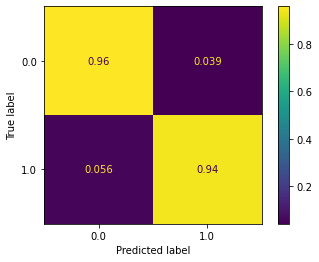

In [275]:
# Examing the normalised confusion matrix for the outlier data 

plt.figure(figsize=(10,10))
plot_confusion_matrix(rfc, X_2_outliers[select_feat], y_2_outliers, normalize='true')

In [276]:
# Overview of key metrics to evaluate the model's performance on the outlier data

print(classification_report(y_2_outliers, rfc.predict(X_2_outliers[select_feat])))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.95       127
         1.0       0.97      0.94      0.96       161

    accuracy                           0.95       288
   macro avg       0.95      0.95      0.95       288
weighted avg       0.95      0.95      0.95       288



# Next Steps

- Get more data.
- Apply Grid Search to optimize model hyperparameters.
- Factor frequency of interactions into feature engineering.
- Conduct NLP to evaluate sentiment of interaction and factor into feature engineering.
- Filter out bots.


- Try to predict more detailed target classes eg post, comment, both, neither.
- Experiment with more target subreddits.
